#### **Introduction: Machine Learning Predictions of H1N1 and Seasonal Vaccination Uptake**

Back in June 2009, the World Health Organization (WHO) declared influenza a global pandemic. This was just was two months after its first outbreak in North America. At the time of its pandemic status declaration, a total of 74 coutries had already reported their first case of the A(H1N1) virus infection. The virus caused respiratory complications leading to about 284, 500 deaths globally, which was an estimate of about 0.007% of the world's population. As a prevention mechanism to counter further infections, the H1N1 and seasonal flu vaccines were developed and availed to the public in October 2009. 


**Problem Statement:** 

This project aims to predict the probability frequencies of H1N1 and seasonal flu vaccine administration, using data collected in the National 2009 H1N1 Flu Survey. These predictions will be crucial for guiding the health sector on future vaccination startegies to implement in the face of pandemic and/or epidemic outbreaks.

**Objectives:**

        1. Predict the probabilities of receiving H1N1 flu vaccine.

        2. Predict the probabilities of receiving seasonal flu vaccine.

**1. Import libraries**

The following modules and libraries will be utilised for EDA, data cleaning, modeling and visualizations.


In [1]:
# EDA and data cleaning
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from IPython.display import display

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


Load all the data ...

In [2]:
training_set_labels = pd.read_csv(r'.\Data\training_set_labels.csv')
training_set_features = pd.read_csv(r'.\Data\training_set_features.csv')
test_set_features = pd.read_csv(r'.\Data\test_set_features.csv')

print ('Training Set Labels:')
display (training_set_labels.head())

print ('Training Set Features:')
display (training_set_features.head())

print ('Test Set Features:')
display (test_set_features.head())

Training Set Labels:


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


Training Set Features:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


Test Set Features:


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


Merge the training_set_labels to both the training_set_features and the test_set_features.

In [3]:
# Merge training_set_labels.csv to training_set_features
training_set_df = pd.merge(training_set_labels, training_set_features, on='respondent_id', how='inner')

# Add training_set_labels to test_set_features
test_set_df = pd.concat([training_set_labels, test_set_features], axis=1)

**2. Exploratory Data Analysis**

Start the EDA process using the training_set_df, familiarize with this dataframe and check for inconsistencies.

In [4]:
training_set_df.shape

(26707, 38)

In [5]:
training_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_vaccine                 26707 non-null  int64  
 2   seasonal_vaccine             26707 non-null  int64  
 3   h1n1_concern                 26615 non-null  float64
 4   h1n1_knowledge               26591 non-null  float64
 5   behavioral_antiviral_meds    26636 non-null  float64
 6   behavioral_avoidance         26499 non-null  float64
 7   behavioral_face_mask         26688 non-null  float64
 8   behavioral_wash_hands        26665 non-null  float64
 9   behavioral_large_gatherings  26620 non-null  float64
 10  behavioral_outside_home      26625 non-null  float64
 11  behavioral_touch_face        26579 non-null  float64
 12  doctor_recc_h1n1             24547 non-null  float64
 13  doctor_recc_seas

Check for the type of variables associated with the dtype object columns ...

In [6]:
# Find categorical variables with dtype object
categorical = [var for var in training_set_df.columns if training_set_df[var].dtype == 'O']

training_set_df[categorical].nunique()

age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      21
employment_occupation    23
dtype: int64

the dtype object columns are clearly categorical variables, namely:

    - age_group
    - education
    - race
    - sex
    - income_poverty
    - marital_status
    - rent_or_own
    - employment_status
    - hhs_geo_region
    - census_msa
    - employment_industry
    - employment_occupation

**3. Data Cleaning**

Due to the nature of this project, the following columns will be dropped due to lack of sufficient relevance:

    - employment_industry
    - employment_occupation
    - rent_or_own

In [7]:
# Drop the three columns
training_set_df = training_set_df.drop(columns=['employment_industry', 'employment_occupation', 'rent_or_own'])

categorical = [var for var in training_set_df.columns if training_set_df[var].dtype == 'O']

training_set_df[categorical].columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'employment_status', 'hhs_geo_region', 'census_msa'],
      dtype='object')

Check for null values in the dtype object columns ...

In [8]:
training_set_df[categorical].isna().sum()

age_group               0
education            1407
race                    0
sex                     0
income_poverty       4423
marital_status       1408
employment_status    1463
hhs_geo_region          0
census_msa              0
dtype: int64

four columns have null values.

Check for frequency distribution in the training_set_df, to decide on how to handle the null values ...

In [9]:
import numpy as np 
for var in training_set_df: 
    
    print(training_set_df[var].value_counts()/np.float64(len(training_set_df)))

respondent_id
0        0.000037
17736    0.000037
17812    0.000037
17811    0.000037
17810    0.000037
           ...   
8898     0.000037
8897     0.000037
8896     0.000037
8895     0.000037
26706    0.000037
Name: count, Length: 26707, dtype: float64
h1n1_vaccine
0    0.787546
1    0.212454
Name: count, dtype: float64
seasonal_vaccine
0    0.534392
1    0.465608
Name: count, dtype: float64
h1n1_concern
2.0    0.395964
1.0    0.305276
3.0    0.171902
0.0    0.123413
Name: count, dtype: float64
h1n1_knowledge
1.0    0.546598
2.0    0.355225
0.0    0.093833
Name: count, dtype: float64
behavioral_antiviral_meds
0.0    0.948628
1.0    0.048714
Name: count, dtype: float64
behavioral_avoidance
1.0    0.719961
0.0    0.272251
Name: count, dtype: float64
behavioral_face_mask
0.0    0.930355
1.0    0.068933
Name: count, dtype: float64
behavioral_wash_hands
1.0    0.824316
0.0    0.174112
Name: count, dtype: float64
behavioral_large_gatherings
0.0    0.639271
1.0    0.357472
Name: count, dtyp

The frequency distribution is mainly uniform. Since these are categorical variables, use OHE to create new columns including a null column for each variable with missing data.

**4. One Hot Encoding (OHE)**

In [10]:
# OHE for all categorical columns, add additional columns for missing data
training_set_categorical = pd.get_dummies(training_set_df[categorical], drop_first= True, dummy_na= True, dtype= int)

# Drop columns where nans=0
training_set_categorical = training_set_categorical.loc[:, (training_set_categorical != 0).any(axis=0)]

training_set_categorical.head()

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_nan,race_Hispanic,race_Other or Multiple,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
training_set_categorical.shape

(26707, 31)

After the OHE process, the categorical data frame that initially had dtype object has been converted into binary with a total of 31 columns.

Check for null to make sure that all null values were filled.

In [12]:
training_set_categorical.isna().sum()

age_group_35 - 44 Years                 0
age_group_45 - 54 Years                 0
age_group_55 - 64 Years                 0
age_group_65+ Years                     0
education_< 12 Years                    0
education_College Graduate              0
education_Some College                  0
education_nan                           0
race_Hispanic                           0
race_Other or Multiple                  0
race_White                              0
sex_Male                                0
income_poverty_> $75,000                0
income_poverty_Below Poverty            0
income_poverty_nan                      0
marital_status_Not Married              0
marital_status_nan                      0
employment_status_Not in Labor Force    0
employment_status_Unemployed            0
employment_status_nan                   0
hhs_geo_region_bhuqouqj                 0
hhs_geo_region_dqpwygqj                 0
hhs_geo_region_fpwskwrf                 0
hhs_geo_region_kbazzjca           

Move to columns in the training_set_df with the dtype int and check for the type of variables associated with these columns ...

In [13]:
training_set_numeric = training_set_df.select_dtypes(include= 'number')
training_set_numeric.nunique()

respondent_id                  26707
h1n1_vaccine                       2
seasonal_vaccine                   2
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
household_adults                   4
household_children                 4
dtype: int64

the variables are all categorical with several binary variables. Drop the respondent_id column as it is a unique identifier and check for null values ...

In [14]:
# Drop id column
training_set_numeric = training_set_numeric.drop(columns=['respondent_id'])

training_set_numeric.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

this null values will mostly be filled during the OHE process, however to reduce the number of columns after OHE columns with null values < 200 will be filled by the modal value.

In [15]:
# Identify columns with na < 200
def fill_na_less_200(column):
    if column.isna().sum() < 200:
        modal_value = column.mode()[0]
        return column.fillna(modal_value)
    return column

# Fill na with mode
training_set_numeric = training_set_numeric.apply(fill_na_less_200)
training_set_numeric.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                       0
h1n1_knowledge                     0
behavioral_antiviral_meds          0
behavioral_avoidance             208
behavioral_face_mask               0
behavioral_wash_hands              0
behavioral_large_gatherings        0
behavioral_outside_home            0
behavioral_touch_face              0
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

ohe the remaining null values ... 

In [16]:
training_set_numeric = training_set_numeric.astype(str).fillna('NA')

ohe = OneHotEncoder(drop= 'first', sparse_output= False, dtype= int)

training_set_numeric = training_set_numeric.fillna('NA')
columns_nan = training_set_numeric.columns[(training_set_numeric == 0).all()]
columns_nan.nunique()

ohe.fit(training_set_numeric)
training_set_numeric_encoded = ohe.transform(training_set_numeric)

training_set_numeric = pd.DataFrame(training_set_numeric_encoded, columns=ohe.get_feature_names_out(training_set_numeric.columns))

training_set_numeric.nunique()

h1n1_vaccine_1            2
seasonal_vaccine_1        2
h1n1_concern_1.0          2
h1n1_concern_2.0          2
h1n1_concern_3.0          2
                         ..
household_adults_nan      2
household_children_1.0    2
household_children_2.0    2
household_children_3.0    2
household_children_nan    2
Length: 65, dtype: int64

the categorical data frame that initially had dtype object has been converted into binary with a total of 96 columns.

Merge the training_set_numeric and the training_set_categorical into one dataframe.

In [17]:
training_set_df = pd.concat([training_set_numeric, training_set_categorical], axis= 1)
training_set_df.shape

(26707, 96)

The training_set_df is now cleaned and ready for modeling.

**5. Data cleaning (test dataframe)**

Repeat the same data cleaning process on the test data for consistency.

In [18]:
test_set_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  float64
 1   h1n1_vaccine                 26707 non-null  float64
 2   seasonal_vaccine             26707 non-null  float64
 3   respondent_id                26708 non-null  int64  
 4   h1n1_concern                 26623 non-null  float64
 5   h1n1_knowledge               26586 non-null  float64
 6   behavioral_antiviral_meds    26629 non-null  float64
 7   behavioral_avoidance         26495 non-null  float64
 8   behavioral_face_mask         26689 non-null  float64
 9   behavioral_wash_hands        26668 non-null  float64
 10  behavioral_large_gatherings  26636 non-null  float64
 11  behavioral_outside_home      26626 non-null  float64
 12  behavioral_touch_face        26580 non-null  float64
 13  doctor_recc_h1n1

In [19]:
# Drop the following columns: employment_industry, employment_occupation, rent_or_own, 'respondent_id'
test_set_df = test_set_df.drop(columns= ['employment_industry', 'employment_occupation', 'rent_or_own', 'respondent_id'])

# Check for missing values
test_set_df.isna().sum()

h1n1_vaccine                       1
seasonal_vaccine                   1
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
i

Use mode and OHE to fill in missing values.

In [20]:
# Where a column has a na < 200, fill na with the modal value.
def fill_na_less_200(column):
    if column.isna().sum() < 200:
        modal_value = column.mode()[0]
        return column.fillna(modal_value)
    return column

test_set_df = test_set_df.apply(fill_na_less_200)

In [21]:
# OHE the test_set_df

# Identify categorical variables with dtype object
test_categorical = [var for var in test_set_df.columns if test_set_df[var].dtype == 'O']

# OHE for all categorical columns, add additional columns for missing data
test_categorical = pd.get_dummies(test_set_df[test_categorical], drop_first= True, dummy_na= True, dtype= int)

# Drop columns where nans=0
test_categorical = test_categorical.loc[:, (test_categorical != 0).any(axis=0)]

test_categorical.isna().sum()

age_group_35 - 44 Years                 0
age_group_45 - 54 Years                 0
age_group_55 - 64 Years                 0
age_group_65+ Years                     0
education_< 12 Years                    0
education_College Graduate              0
education_Some College                  0
education_nan                           0
race_Hispanic                           0
race_Other or Multiple                  0
race_White                              0
sex_Male                                0
income_poverty_> $75,000                0
income_poverty_Below Poverty            0
income_poverty_nan                      0
marital_status_Not Married              0
marital_status_nan                      0
employment_status_Not in Labor Force    0
employment_status_Unemployed            0
employment_status_nan                   0
hhs_geo_region_bhuqouqj                 0
hhs_geo_region_dqpwygqj                 0
hhs_geo_region_fpwskwrf                 0
hhs_geo_region_kbazzjca           

In [22]:
test_categorical.shape

(26708, 31)

In [23]:
# Identify categotical variables with dtype int
test_numeric = test_set_df.select_dtypes(include= 'number')

# Fill na with 'NA' where na is a string
test_numeric = test_numeric.astype(str).fillna('NA')

# OHE 
ohe = OneHotEncoder(drop= 'first', sparse_output= False, dtype= int)

# test_numeric = test_numeric.fillna('NA')
# columns_nan = test_numeric.columns[(test_numeric == 0).all()]
# columns_nan.nunique()

ohe.fit(test_numeric)
test_numeric_encoded = ohe.transform(test_numeric)

test_numeric = pd.DataFrame(test_numeric_encoded, columns=ohe.get_feature_names_out(test_numeric.columns))

test_numeric.isna().sum()

h1n1_vaccine_1.0          0
seasonal_vaccine_1.0      0
h1n1_concern_1.0          0
h1n1_concern_2.0          0
h1n1_concern_3.0          0
                         ..
household_adults_nan      0
household_children_1.0    0
household_children_2.0    0
household_children_3.0    0
household_children_nan    0
Length: 65, dtype: int64

In [24]:
# Merge the categorical and numeric dfs
test_set_df = pd.concat([test_categorical, test_numeric], axis= 1)
test_set_df.shape

(26708, 96)

In [25]:
# Merge and rename the vaccines columns for consistency across the training and test dfs
test_set_df = test_set_df.rename(columns={'h1n1_vaccine_1.0':'h1n1_vaccine_1', 'seasonal_vaccine_1.0':'seasonal_vaccine_1'})
test_set_df = test_set_df[training_set_df.columns]

Both the training and testing data sets are cleaned and ready for modeling.

**6. Train-Test Split**

Split the training_set_df into a train and test subsets for training and testing the model.

    a. h1n1_vaccine
Start with h1n1 vaccine as the dependent variable (y).

In [26]:
# Define X and y
y = training_set_df['h1n1_vaccine_1']
X = training_set_df.drop(columns= 'h1n1_vaccine_1')


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

X_train.shape, X_test.shape

((21365, 95), (5342, 95))

In [27]:
X_train.describe()

,seasonal_vaccine_1,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_avoidance_nan,behavioral_face_mask_1.0,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
count,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,...,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000
mean,0.467306,0.306717,0.398923,0.171589,0.550012,0.356939,0.049193,0.718980,0.007629,0.070302,...,0.042312,0.121554,0.109057,0.078259,0.159420,0.082659,0.108963,0.117061,0.293939,0.272268
std,0.498942,0.461141,0.489688,0.377032,0.497504,0.479108,0.216275,0.449508,0.087014,0.255661,...,0.201305,0.326778,0.311718,0.268585,0.366075,0.275372,0.311600,0.321500,0.455575,0.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**7. Model Training**

Start with logistic regression as the first classifier ...

In [28]:
# Train and fit the training data into the model
logreg = LogisticRegression(solver='liblinear', random_state= 42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

check for predictions and model accuracy ...

In [29]:
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)


y_pred_train, y_pred_test

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 1, 0, 0]))

check and compare the accuracy score of y_pred_train and y_pred_test ...

In [30]:

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

print('Training_set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score: 0.8680
Training_set accuracy score: 0.8700


The model accuracy score is at 86.8% which indicates that the model will perform really goog to unseen data.

Check for overfitting and underfitting ...

In [31]:
print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8700
Test set score: 0.8680


The training set score and test set score very close, which is a good indication of the model generalization to new data as there is no significant overfitting or underfitting.

Compare model accuracy with null accuracy to verify model performance ...

In [32]:
y_test.value_counts()

h1n1_vaccine_1
0    4212
1    1130
Name: count, dtype: int64

In [33]:
null_accuracy = (4212/(4212+1130))

print('Null accuracy score: {0:04f}'.format(null_accuracy))

Null accuracy score: 0.788469


The model accuracy 0.8680 is higher than the null accuracy score 0.7885 which shows that the model is effectively learning pattern of the data. Additionally a null accuracy score of 78.9% demonstrates the model's ability to predict the most common class.

Check for probabilities of predicted y ...

In [34]:
y_pred_prob = logreg.predict_proba(X_test)

y_pred_prob_df = pd.DataFrame(data= y_pred_prob, columns=['no h1n1_vaccine (0)', 'yes h1n1_vaccine (1)'])
y_pred_prob_df

,no h1n1_vaccine (0),yes h1n1_vaccine (1)
0,0.883116,0.116884
1,0.633374,0.366626
2,0.986290,0.013710
3,0.854798,0.145202
4,0.980184,0.019816
...,...,...
5337,0.549692,0.450308
5338,0.921455,0.078545
5339,0.420767,0.579233
5340,0.988587,0.011413


plot a histogram of the predicted y ...

Text(0, 0.5, 'frequency')

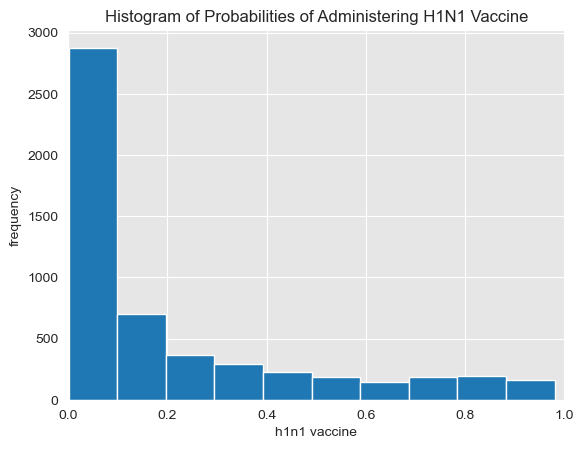

In [35]:
# Strore the probabilities of yes vaccine
y_pred1 = logreg.predict_proba(X_test)[:, 1]

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Plot a histogram of the predicted probabilities
plt.hist(y_pred1, bins= 10)
plt.title('Histogram of Probabilities of Administering H1N1 Vaccine')
plt.xlim(0,1)

plt.xlabel('h1n1 vaccine')
plt.ylabel('frequency')


The distribution of predicted values for y are negatively skewed this indicates that a huge population has very low vaccination uptake.

**8.ROC - AUC**

Use the ROC - AUC metric to measure the classification model performance. Start by plotin the ROC curve ...

ROC AUC Score : 0.8924


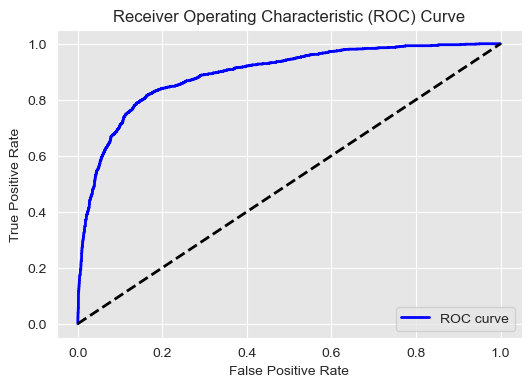

In [36]:
# Plot AUC curve
y_score = logreg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_score)

# ROC - AUC score
ROC_AUC = roc_auc_score(y_test, y_pred1)
print('ROC AUC Score : {:.4F}'.format(ROC_AUC))

plt.figure(figsize= (6, 4))
lw= 2
plt.plot(fpr, tpr, color= 'blue', lw= lw, label= 'ROC curve')

plt.plot([0, 1], [0, 1], color= 'black', lw= lw, linestyle= '--')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 'lower right')
plt.show()

with a ROC-AUC score of 0.8924 and a relatively big Area Under The Curve, this model is therefore more reliable in distinguishing between various classess and will perform well on unseen data.

Now that the model's performance on unseen data is established, fit the test_set_df into the model to get predictions for h1n1_vaccine administration.

In [37]:
# Ensure the columns of the test_set_df are aligned to the X.train columns
test_set_df1 = test_set_df[X_train.columns]

# Drop columns that are not aligned to X.train if any
for col in X_train.columns:
    if col not in test_set_df1.columns:
        test_set_df1[col] = 0

In [38]:
# Fit the test_set_df into the logistic regression model
model = LogisticRegression(max_iter= 1000)
model.fit(X_train, y_train)

# Predict for y in the test_set_df
y_predictions_prob = model.predict_proba(test_set_df1)
y_predictions_prob_df = pd.DataFrame(data= y_predictions_prob, columns=['no h1n1_vaccine (0)', 'yes h1n1_vaccine (1)'])
y_predictions_prob_df = y_predictions_prob_df.round(1).drop(columns= ['no h1n1_vaccine (0)'])
y_predictions_prob_df

,yes h1n1_vaccine (1)
0,0.1
1,0.2
2,0.1
3,0.6
4,0.2
...,...
26703,0.1
26704,0.3
26705,0.1
26706,0.0


**9. Train-Test Split**

Split the training_set_df into a train and test subsets for training and testing the model.

    b. seasonal_vaccine
Move to h1n1 vaccine as the dependent variable (y) and repeat the classification modeling process with logistic regression.

In [39]:
# Define X and y using the training_set_df
y = training_set_df['seasonal_vaccine_1']
X = training_set_df.drop(columns= 'seasonal_vaccine_1')


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

X_train.shape, X_test.shape

((21365, 95), (5342, 95))

In [40]:
X_train.describe()

,h1n1_vaccine_1,h1n1_concern_1.0,h1n1_concern_2.0,h1n1_concern_3.0,h1n1_knowledge_1.0,h1n1_knowledge_2.0,behavioral_antiviral_meds_1.0,behavioral_avoidance_1.0,behavioral_avoidance_nan,behavioral_face_mask_1.0,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
count,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,...,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000,21365.000000
mean,0.212684,0.306717,0.398923,0.171589,0.550012,0.356939,0.049193,0.718980,0.007629,0.070302,...,0.042312,0.121554,0.109057,0.078259,0.159420,0.082659,0.108963,0.117061,0.293939,0.272268
std,0.409216,0.461141,0.489688,0.377032,0.497504,0.479108,0.216275,0.449508,0.087014,0.255661,...,0.201305,0.326778,0.311718,0.268585,0.366075,0.275372,0.311600,0.321500,0.455575,0.445137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
# Train the new model
logreg001 = LogisticRegression(C= 100, solver='liblinear', random_state= 42)
logreg001.fit(X_train, y_train)

LogisticRegression(C=100, random_state=42, solver='liblinear')

In [42]:
# Compare model accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))
print('Training_set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Model accuracy score: 0.6818
Training_set accuracy score: 0.6783


A model accuracy of 0.6818 is good however it is relatively lower compared to the h1n1 model. This could either be as a result of class imbalance of overfitting and underfitting. Let's check for overfitting and underfitting to verify ...

In [43]:
# Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8027
Test set score: 0.8085


The raining set score and the test set score are very close which indicates that the model generalization is pretty much good.

Compare model accuracy with null accuracy for further verification ...

In [44]:
y_test.value_counts()

seasonal_vaccine_1
0    2891
1    2451
Name: count, dtype: int64

In [45]:
# Compare model accuracy with null accuracy
null_accuracy = (4212/(4212+1130))

print('Null accuracy score: {0:04f}'.format(null_accuracy))

Null accuracy score: 0.788469


The model accuracy 0.6818 is higher than the null accuracy score 0.7885 which indicates that the model is not effectively learning the data pettern and this could be due to class imbalance in the data. However a null accuracy score of 78.9% demonstrates that model's ability to predict the most common class is good.

**10. K-Fold Cross Validation**

Employ K-fold cross validation to assess model performance

In [46]:
# K-fold cross validation
scores = cross_val_score(logreg001, X_train, y_train, cv=10, scoring= 'accuracy')

print('Cross validation score: {}'.format(scores))

Cross validation score: [0.81235377 0.80486664 0.80065512 0.79410388 0.81422555 0.78464419
 0.77902622 0.79681648 0.79166667 0.82397004]


In [47]:
# Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8002


The model's average cross validation score of 0.80 is higher than the original model score of 0.6783 an indication of the model's good generalization and robustness. This is however still lower than the h1n1 model accuracy. 

Look at the probability distribution of the data to decide on whether to mode to a different model ...

In [48]:
# Check the probabilities of y_pred

y_pred_prob = logreg001.predict_proba(X_test)

y_pred_prob_df = pd.DataFrame(data= y_pred_prob, columns=['no seasonal_vaccine (0)', 'yes seasonal_vaccine (1)'])
y_pred_prob_df

,no seasonal_vaccine (0),yes seasonal_vaccine (1)
0,0.833889,0.166111
1,0.867780,0.132220
2,0.158789,0.841211
3,0.819210,0.180790
4,0.852104,0.147896
...,...,...
5337,0.043515,0.956485
5338,0.772232,0.227768
5339,0.296090,0.703910
5340,0.391313,0.608687


Text(0, 0.5, 'frequency')

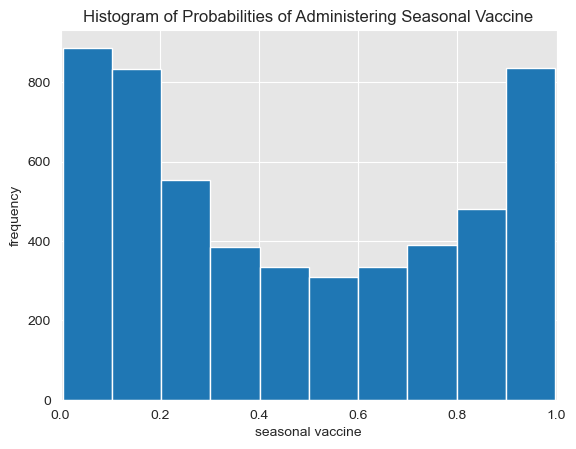

In [49]:
# Store the probabilities of yes vaccine
y_pred1 = logreg001.predict_proba(X_test)[:, 1]

# Plot a histogram of the predicted probabilities
plt.hist(y_pred1, bins= 10)
plt.title('Histogram of Probabilities of Administering Seasonal Vaccine')
plt.xlim(0,1)

plt.xlabel('seasonal vaccine')
plt.ylabel('frequency')

This is a bimodial distribution which is as a result of class imbalance, caused by the presence of different groups with different characteristics. This negatively affects the model generalization and it could be the cause of the low model accuracy.

To solve this problem, use decision trees to model the predictors of seasonal_vaccine as they are not heavily affected by class imbalance.

**10. Decission Tree**

Use decision trees as a classifier to model and predict the seasonal_vaccine.

In [50]:
# Define X and y
y = training_set_df['seasonal_vaccine_1']
X = training_set_df.drop(columns= 'seasonal_vaccine_1')


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

# Train and fit X_train into a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth= 10, criterion= 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [51]:
# Check the hyperparameters of this classifier
clf = clf.fit(X_train, y_train)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [52]:
# Predict y using X_test
predictions = clf.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
#Predict the probability of y
pred_proba = clf.predict_proba(X_test)
pred_proba

array([[0.83236994, 0.16763006],
       [0.83236994, 0.16763006],
       [0.33333333, 0.66666667],
       ...,
       [0.625     , 0.375     ],
       [1.        , 0.        ],
       [0.52      , 0.48      ]])

In [54]:
accuracy_score(y_test, predictions)

0.7766754024709847

The decision tree classifier has a higher accuracy score of 0.7756, which is higher than the logistic regression model accuracy score of 0.6818. This indicates that a data with a high class imbalance will perform much better with the decision trees classifier.

**11. Confusion Matrix**

Check for model performance accross different classess using a confusion matrix.

In [55]:
# Confusion matrix
confusion_matrix(y_test, predictions, labels=[0, 1])

array([[2335,  556],
       [ 637, 1814]], dtype=int64)

    - True Negative (TN): 2334

    - False Negative (FN): 557

    - False Positive (TP): 642

    - True Positive (FP): 1809

Check for the classification report metrics for further evaluation of the classification matrix ...

In [56]:
# Classification report
print(classification_report(y_test, predictions, target_names= ['vaccinated', 'not vaccinated']))

                precision    recall  f1-score   support

    vaccinated       0.79      0.81      0.80      2891
not vaccinated       0.77      0.74      0.75      2451

      accuracy                           0.78      5342
     macro avg       0.78      0.77      0.77      5342
  weighted avg       0.78      0.78      0.78      5342



Based on the precision, recall and f1-score, the model clearly handles each class very well, therefore it is a good classifier for the seasonal_vaccine predictions.

Check for the features with the highest influence on the predictions ...

In [57]:
feature_names = X.columns
feature_relevance = pd.DataFrame(clf.feature_importances_, index= feature_names).sort_values(0, ascending= False)
feature_relevance.head(20)

,0
h1n1_vaccine_1,0.244599
opinion_seas_vacc_effective_5.0,0.180420
doctor_recc_seasonal_1.0,0.121474
age_group_65+ Years,0.055238
opinion_seas_risk_4.0,0.043675
doctor_recc_h1n1_1.0,0.039989
opinion_seas_risk_5.0,0.026551
opinion_seas_risk_2.0,0.013468
age_group_55 - 64 Years,0.011342
income_poverty_Below Poverty,0.010725


<Axes: title={'center': 'Seasonal Vaccines Top 20 Influential Predictors'}, xlabel='predictors', ylabel='relevance'>

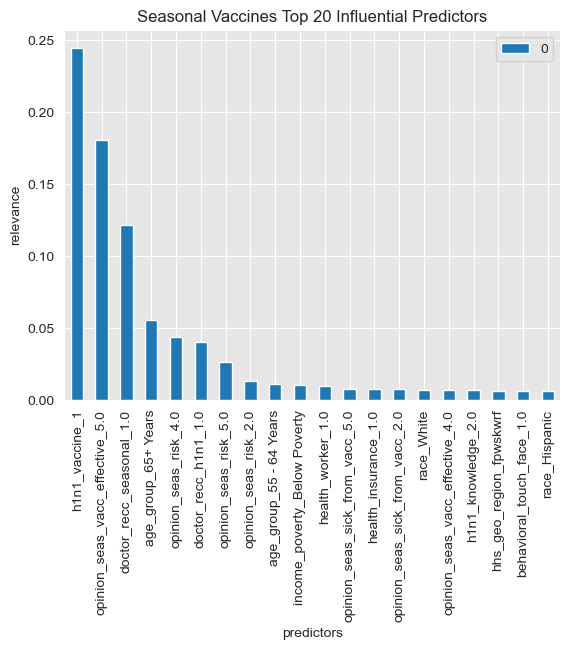

In [58]:
# Plot a bar graph to visualize the feature relevance

feature_relevance.head(20).plot(kind= 'bar', title= 'Seasonal Vaccines Top 20 Influential Predictors', xlabel= 'predictors', ylabel= 'relevance')

from the above visualization, clearly receiving the h1n1_vaccine has a major influence on a person's choice on receiving the seasonal_vaccine.

Now that the model's performance on unseen data is established, fit the test_set_df into the model to predict for the seasonal_vaccine administration.

In [59]:
# Ensure the columns of the test_set_df are aligned to the X.train columns
test_set_df2 = test_set_df[X_train.columns]

# Fit the test_set_df into the decision tree classifier
model = DecisionTreeClassifier(max_depth= 10, criterion= 'entropy')
model.fit(X_train, y_train)

# Predict for y in the test_set_df
y_predictions_prob = model.predict_proba(test_set_df2)
y_predictions_prob_df1 = pd.DataFrame(data= y_predictions_prob, columns=['no seasonal_vaccine (0)', 'yes seasonal_vaccine (1)'])
y_predictions_prob_df1 = y_predictions_prob_df1.round(1).drop(columns= ['no seasonal_vaccine (0)'])
y_predictions_prob_df1

,yes seasonal_vaccine (1)
0,0.1
1,0.0
2,1.0
3,0.0
4,0.4
...,...
26703,0.3
26704,0.3
26705,0.2
26706,0.0


In [60]:
predictions_df = pd.concat([test_set_features['respondent_id'], y_predictions_prob_df, y_predictions_prob_df1], axis=1)
predictions_df = predictions_df.rename(columns= {'yes h1n1_vaccine (1)':'h1n1_vaccine', 'yes seasonal_vaccine (1)': 'seasonal_vaccine'})
predictions_df

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.1,0.1
1,26708,0.2,0.0
2,26709,0.1,1.0
3,26710,0.6,0.0
4,26711,0.2,0.4
...,...,...,...
26703,53410,0.1,0.3
26704,53411,0.3,0.3
26705,53412,0.1,0.2
26706,53413,0.0,0.0


In [61]:
## Save the prediction into csv
predictions_df.to_csv('Vaccine Predictions', index= False)

In [62]:
h1n1_average = predictions_df['h1n1_vaccine'].mean()
seasonal_average = predictions_df['seasonal_vaccine'].mean()
vaccination_average = (h1n1_average + seasonal_average) / 2

print('h1n1 flu vaccine:', h1n1_average)
print('Seasonal flu vaccine: ', seasonal_average)
print('Average vacination uptake: ', vaccination_average)

h1n1 flu vaccine: 0.19325295791523137
Seasonal flu vaccine:  0.47862438220757836
Average vacination uptake:  0.3359386700614049


On average the vaccination rate is at 0.3351, with the predicted probability of receiving the h1n1 vaccine at 0.1932 while the probability of receiving the seasonal flu vaccine is 0.47704.

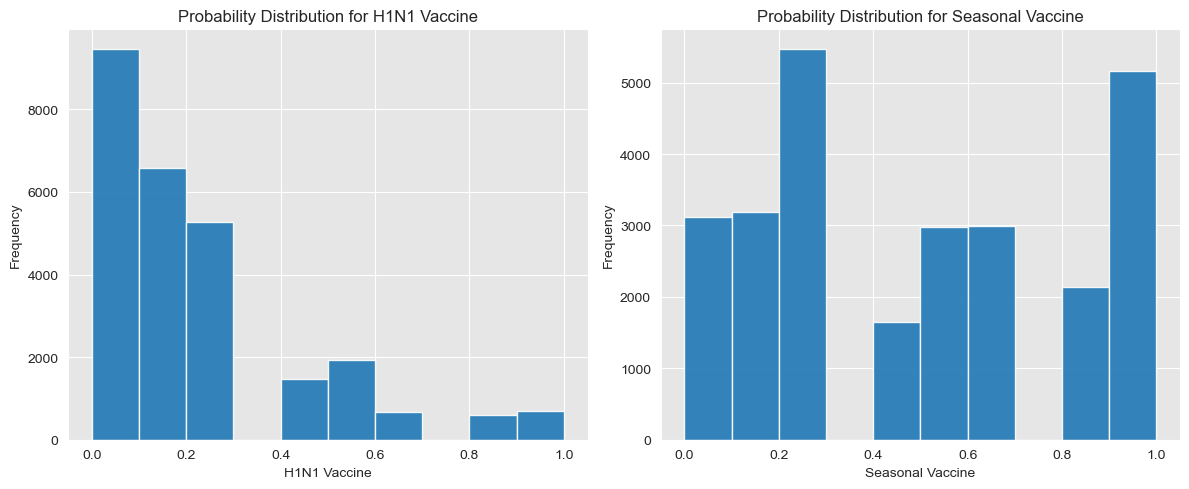

In [63]:
# Plot histograms of the predicted probabilities
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Histogram for h1n1 vaccine probabilities
axes[0].hist(y_predictions_prob_df, bins=10, alpha=0.9)
axes[0].set_xlabel('H1N1 Vaccine')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Probability Distribution for H1N1 Vaccine')

# Histogram for seasonal vaccine probabilities
axes[1].hist(y_predictions_prob_df1, bins=10, alpha=0.9)
axes[1].set_xlabel('Seasonal Vaccine')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Probability Distribution for Seasonal Vaccine')

# Adjust layout
plt.tight_layout()
plt.show()

Both distributions have gaps, which indicate the presence of different instances within different classes of the predictors.

The H1N1 vaccine distribution's more negatively skewed while the seasonal vaccine's distribution on the other hand is multimodal.